# [Lecture 20 In-Class Exercise](https://computing-in-context.afeld.me/lecture_20.html#in-class-exercise) Solution

## Download data

[More about the URL below.](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures)

In [97]:
!mkdir -p data
!wget -O data/electricity.zip "https://api.worldbank.org/v2/country/all/indicator/EG.ELC.ACCS.ZS?source=2&date=2002:2022&downloadformat=csv"

--2024-11-09 18:02:48--  https://api.worldbank.org/v2/country/all/indicator/EG.ELC.ACCS.ZS?source=2&date=2002:2022&downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 104.18.42.231, 172.64.145.25
Connecting to api.worldbank.org (api.worldbank.org)|104.18.42.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27789 (27K) [application/zip]
Saving to: ‘data/electricity.zip’

data/electricity.zi 100%[===================>]  27.14K  --.-KB/s    in 0.001s  

2024-11-09 18:02:49 (42.3 MB/s) - ‘data/electricity.zip’ saved [27789/27789]



In [98]:
!rm -rf data/electricity
!unzip data/electricity.zip -d data/electricity

Archive:  data/electricity.zip
  inflating: data/electricity/Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_EN_csv_v2_83439.csv  
  inflating: data/electricity/API_EG.ELC.ACCS.ZS_DS2_EN_csv_v2_83439.csv  
  inflating: data/electricity/Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_EN_csv_v2_83439.csv  


## Load data

In [99]:
import pandas as pd

electricity = pd.read_csv("./data/electricity/API_EG.ELC.ACCS.ZS_DS2_EN_csv_v2_83439.csv", header=2)
electricity

,Country Name,Country Code,Indicator Name,Indicator Code,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 25
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.900000,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,21.580282,22.516962,23.753953,23.487376,25.198527,26.807288,...,31.860474,33.903800,38.854624,40.199898,43.017148,44.381259,46.264875,48.100862,48.711995,NaN
2,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,14.100000,19.000000,23.800000,28.700000,33.500000,38.400000,...,89.500000,71.500000,97.700000,97.700000,93.400000,97.700000,97.700000,97.700000,85.300000,NaN
3,Africa Western and Central,AFW,Access to electricity (% of population),EG.ELC.ACCS.ZS,35.700600,39.821304,37.492583,37.784220,39.830830,40.743670,...,47.662536,46.758739,50.906115,48.789457,51.211055,51.168083,51.730899,54.224724,55.437577,NaN
4,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,26.300000,27.400000,28.400000,29.400000,30.500000,37.500000,...,32.000000,42.000000,41.800000,42.900000,45.300000,45.600000,47.000000,48.200000,48.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,51.500000,52.600000,49.600000,54.800000,55.800000,57.200000,...,66.100000,67.400000,68.900000,79.200000,62.000000,72.800000,73.900000,74.900000,76.000000,NaN
263,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,76.700000,78.800000,80.600000,80.800000,80.700000,82.000000,...,85.900000,85.300000,83.900000,84.400000,84.700000,85.000000,90.000000,89.300000,86.500000,NaN
264,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,17.400000,18.500000,20.300000,23.300000,24.100000,18.500000,...,27.900000,31.100000,35.400000,40.300000,40.200000,43.000000,44.600000,46.700000,47.800000,NaN


## [Reshape](https://pandas.pydata.org/docs/user_guide/reshaping.html#melt-and-wide-to-long)

In [100]:
electricity_by_country_by_year = electricity.drop(columns=["Indicator Name", "Indicator Code"]).melt(
    id_vars=["Country Name", "Country Code"],
    var_name="Year",
    value_name="Access to electricity (% of population)"
).dropna()

electricity_by_country_by_year

,Country Name,Country Code,Year,Access to electricity (% of population)
0,Aruba,ABW,2002,100.000000
1,Africa Eastern and Southern,AFE,2002,21.580282
2,Afghanistan,AFG,2002,14.100000
3,Africa Western and Central,AFW,2002,35.700600
4,Angola,AGO,2002,26.300000
...,...,...,...,...
5580,Samoa,WSM,2022,98.300000
5582,"Yemen, Rep.",YEM,2022,76.000000
5583,South Africa,ZAF,2022,86.500000
5584,Zambia,ZMB,2022,47.800000


## Plot

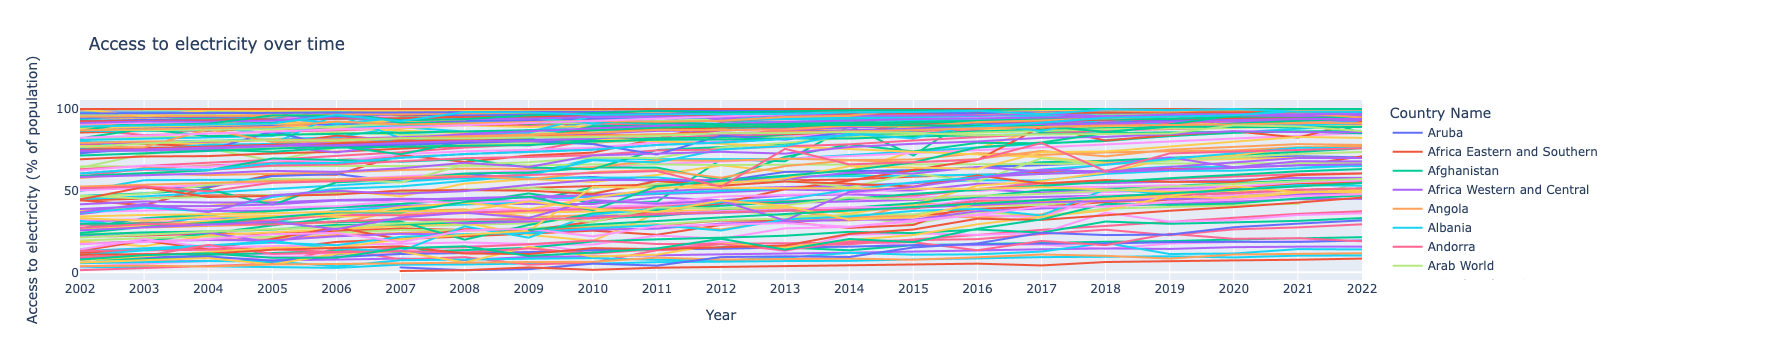

In [101]:
import plotly.express as px

fig = px.line(
    electricity_by_country_by_year,
    x="Year",
    y="Access to electricity (% of population)",
    color="Country Name",
    title="Access to electricity over time"
)
fig.show()

## Filter

In [102]:
avg_electricity = electricity_by_country_by_year.groupby("Country Name")["Access to electricity (% of population)"].mean()
avg_electricity

Country Name
Afghanistan                    61.876190
Africa Eastern and Southern    32.878831
Africa Western and Central     45.321271
Albania                        99.757143
Algeria                        99.142857
                                 ...    
West Bank and Gaza             99.742857
World                          85.355292
Yemen, Rep.                    63.404762
Zambia                         30.523810
Zimbabwe                       40.633333
Name: Access to electricity (% of population), Length: 263, dtype: float64

In [103]:
bottom_cutoff = avg_electricity.quantile(0.05)
bottom_cutoff

np.float64(21.837142857142858)

In [104]:
bottom_countries = avg_electricity[avg_electricity < bottom_cutoff]
bottom_countries

Country Name
Burkina Faso                14.676190
Burundi                      6.547619
Central African Republic    10.990476
Chad                         7.566667
Congo, Dem. Rep.            14.438095
Guinea-Bissau               16.771429
Liberia                     14.768750
Madagascar                  21.823810
Malawi                       9.547619
Mozambique                  20.528571
Niger                       14.133333
Papua New Guinea            16.957143
Sierra Leone                17.604762
South Sudan                  4.475000
Name: Access to electricity (% of population), dtype: float64

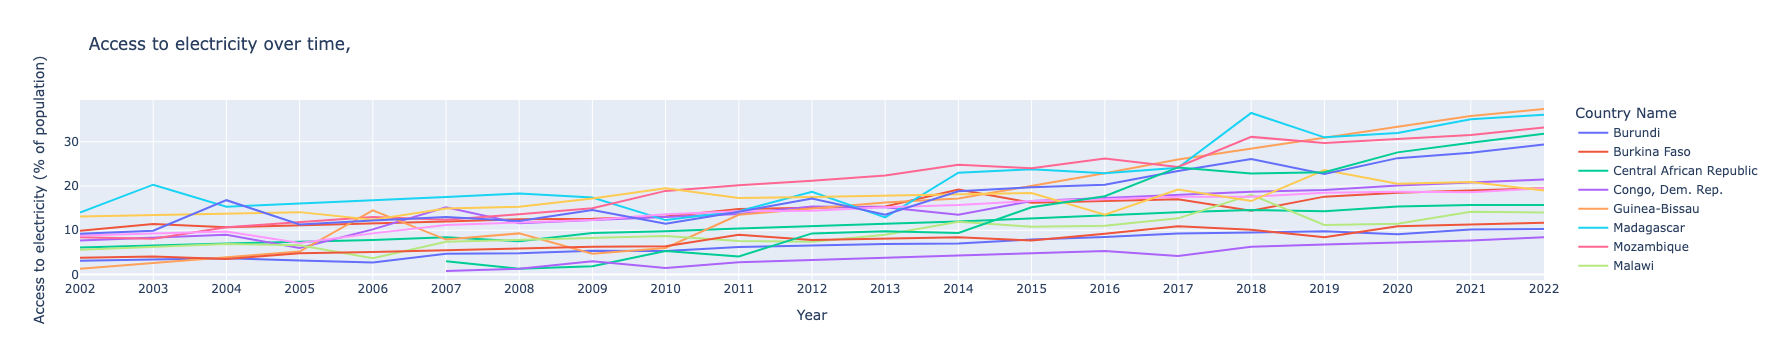

In [105]:
bottom_countries_electricity = electricity_by_country_by_year[electricity_by_country_by_year["Country Name"].isin(bottom_countries.index)]

fig = px.line(
    bottom_countries_electricity,
    x="Year",
    y="Access to electricity (% of population)",
    color="Country Name",
    title="Access to electricity over time, "
)
fig.show()

## Fix year type

In [93]:
bottom_countries_electricity.dtypes

Country Name                                object
Country Code                                object
Year                                        object
Access to electricity (% of population)    float64
dtype: object

In [110]:
bottom_countries_electricity["Year"] = bottom_countries_electricity["Year"].astype(int)

/var/folders/kr/nx0m1j811kz5vy8c87ffchzr0000gn/T/ipykernel_49013/3554936558.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
bottom_countries_electricity = bottom_countries_electricity.copy()
bottom_countries_electricity["Year"] = bottom_countries_electricity["Year"].astype(int)

In [112]:
bottom_countries_electricity.dtypes

Country Name                                object
Country Code                                object
Year                                         int64
Access to electricity (% of population)    float64
dtype: object

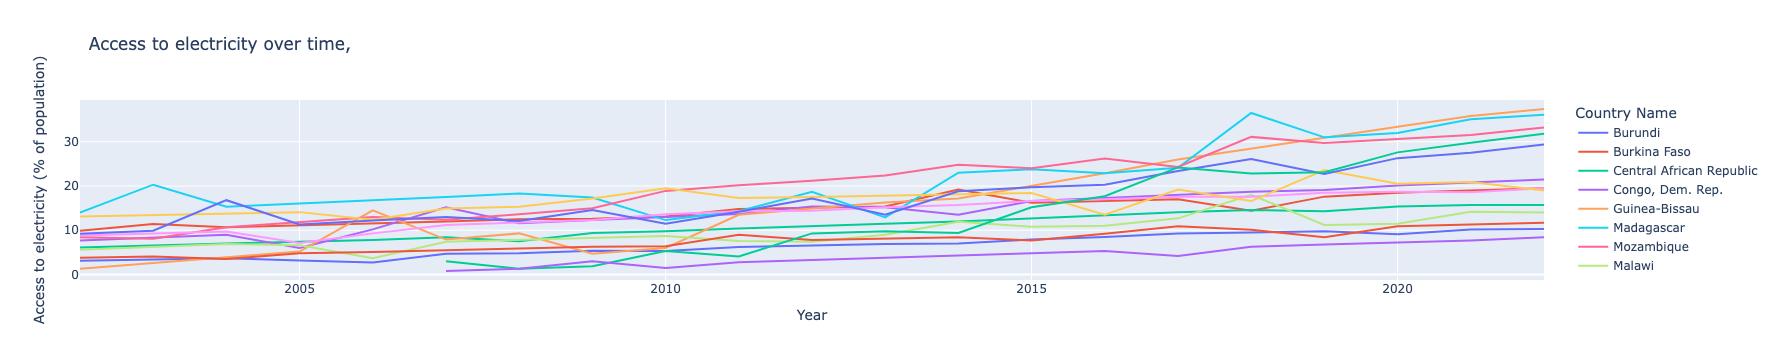

In [113]:
fig = px.line(
    bottom_countries_electricity,
    x="Year",
    y="Access to electricity (% of population)",
    color="Country Name",
    title="Access to electricity over time, "
)
fig.show()